# Importando libs importantes

In [1]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

## Selecionando base de dados

In [2]:
iris = datasets.load_iris()

dados = iris.data
rotulos = iris.target

## Selecionando classificador

In [3]:
clf = SVC()

## Dividindo base de dados em treino e teste

In [4]:
dados_treino, dados_teste, rotulos_treino, rotulos_teste = train_test_split(dados, rotulos, test_size=0.2, stratify=rotulos)

## Treinando classificador

In [5]:
clf.fit(dados_treino, rotulos_treino)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


## Avaliando o classificador (acurácia)

In [6]:
clf.score(dados_teste, rotulos_teste)

0.9666666666666667

## Outra forma usando validação cruzada

In [7]:
from sklearn.model_selection import cross_val_score
import numpy

scores = cross_val_score(clf, dados, rotulos, cv=4)
print(scores)

print(numpy.mean(scores))

[0.97368421 1.         0.94594595 0.97297297]
0.9731507823613088


## Outras métricas de avaliação

In [8]:
from sklearn.model_selection import cross_validate

scoring_list = ['precision_macro', 'recall_macro', 'f1_macro', 'accuracy']

scores = cross_validate(clf, dados, rotulos, cv=4, scoring=scoring_list)

print(scores)

{'fit_time': array([0.00095272, 0.00078058, 0.00065732, 0.00080109]), 'score_time': array([0.00462604, 0.00384808, 0.00431013, 0.00534105]), 'test_precision_macro': array([0.97435897, 1.        , 0.95238095, 0.97619048]), 'test_recall_macro': array([0.97435897, 1.        , 0.94871795, 0.97222222]), 'test_f1_macro': array([0.97333333, 1.        , 0.9465812 , 0.97316157]), 'test_accuracy': array([0.97368421, 1.        , 0.94594595, 0.97297297])}


## Definições de Acurácia, Precisão, Revocação e F1 Score

- **Acurácia:** A acurácia é uma medida geral de quão corretamente um modelo classifica as instâncias. É a proporção de instâncias corretamente classificadas em relação ao total de instâncias. A fórmula da acurácia é:

   \
   $\text{Acurácia} = \frac{\text{Verdadeiros Positivos} + \text{Verdadeiros Negativos}}{\text{Total de Instâncias}}$
   \

- **Precisão:** A precisão é uma medida da qualidade das previsões positivas do modelo. Em outras palavras, é a proporção de verdadeiros positivos em relação ao total de instâncias classificadas como positivas pelo modelo. A fórmula da precisão é:

   \
   $\text{Precisão} = \frac{\text{Verdadeiros Positivos}}{\text{Verdadeiros Positivos} + \text{Falsos Positivos}}$
   \

- **Revocação (Sensibilidade):** A revocação é uma medida da capacidade do modelo de identificar todas as instâncias positivas. Em outras palavras, é a proporção de verdadeiros positivos em relação ao total de instâncias realmente positivas. A fórmula da revocação é:

   \
   $\text{Revocação} = \frac{\text{Verdadeiros Positivos}}{\text{Verdadeiros Positivos} + \text{Falsos Negativos}}$
   \

- **F1 Score:** O F1 Score é a média harmônica entre precisão e revocação. Ele fornece uma única métrica que leva em consideração tanto falsos positivos quanto falsos negativos. O F1 Score é especialmente útil quando há um desequilíbrio significativo entre as classes. A fórmula do F1 Score é:

   \
   $F1 = 2 \times \frac{\text{Precisão} \times \text{Revocação}}{\text{Precisão} + \text{Revocação}}$
   \


## Precisão vs. Revocação: Quando usar uma ou outra?

A escolha entre usar precisão ou revocação depende do contexto específico do problema de classificação e das consequências de diferentes tipos de erros.

### Ênfase na Precisão:

- **Detecção de Spam:** Em casos de detecção de e-mails de spam, é crucial minimizar os falsos positivos (e-mails legítimos marcados como spam). Nesse cenário, uma alta precisão é preferível para garantir que a maioria dos e-mails marcados como spam seja realmente spam.
- **Recomendações de Produtos:** Em sistemas de recomendação, se o custo de recomendar itens irrelevantes (falsos positivos) for alto, você pode preferir ter alta precisão para garantir que as recomendações sejam altamente relevantes para o usuário.

### Ênfase na Revocação (Sensibilidade):

- **Detecção de Fraudes:** Em detecção de fraudes, como em transações financeiras, é crucial capturar o máximo possível de casos fraudulentos (alta revocação), mesmo que isso signifique identificar alguns casos legítimos como fraudes (falsos positivos).
- **Detecção de Doenças Graves:** Em diagnósticos médicos para doenças graves, como câncer, é importante garantir que o máximo possível de casos positivos (doentes) sejam identificados pelo modelo (alta revocação), mesmo que isso resulte em alguns falsos alarmes (falsos positivos).

Em muitos casos, é necessário encontrar um equilíbrio entre precisão e revocação, dependendo das necessidades específicas do problema. O F1 Score é uma métrica que combina precisão e revocação e pode ser útil para encontrar esse equilíbrio, especialmente quando há um desequilíbrio entre as classes (por exemplo, quando uma classe é muito mais prevalente do que a outra).


## Matriz de confusão

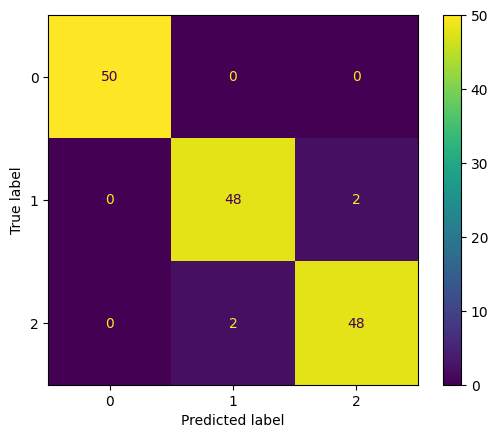

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt


y_pred = cross_val_predict(clf, dados, rotulos, cv=10)
conf_mat = confusion_matrix(rotulos, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
# Then just plot it:
disp.plot()
# And show it:
plt.show()